In [2]:
# Import modules
import Functional_Data_functions
from Functional_Data_functions import Hyperparameter_Test_n_data,LSTM_class,conv_total_out, Smoothing_method,weights_init_normal,HyperParameters,Hyperparameter_Search,Hyperparameter_Test,Hyper_parameter_GridSearch,TSCNN,Compile_train,Compare_epochs, from_torch_to_Datagrid
from Functional_Data_functions import Compare_epochs,Compile_class
import inspect
import random
import torch
import torch.nn.init as init
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import os
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.nn.utils.rnn import pack_sequence
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib
from scipy.stats import norm
# matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
import skfda as fda
from skfda import representation as representation
from skfda.exploratory.visualization import FPCAPlot
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial
import scipy
from scipy.interpolate import BSpline
import os
import ignite
from tqdm import tqdm
import sklearn
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import random
from random import seed
from scipy import stats
import statistics
from statistics import stdev
import gc
import skfda
from skfda import FDataGrid as fd
from skfda.representation.basis import BSpline as B
from Hyper_parameter_search import Compare_n_datas

In [3]:
##Importation des 1ère données: Phonèmes
##Tâche: Classification en 5 classes 
Phoneme=skfda.datasets.fetch_cran("phoneme",package_name="fda.usc")
phoneme=Phoneme['phoneme']

x_train,x_test,y_train,y_test=phoneme['learn'],phoneme['test'],phoneme['classlearn'],phoneme['classtest']


x_train_tensor=torch.tensor(x_train.data_matrix).reshape(250,1,150).cuda().float()
x_test_tensor=torch.tensor(x_test.data_matrix).reshape(250,1,150).cuda().float()
y_train_tensor=torch.tensor(y_train.codes).unsqueeze(1).unsqueeze(2).long().cuda()
y_test_tensor=torch.tensor(y_test.codes).unsqueeze(1).unsqueeze(2).long().cuda()

X1=torch.cat([x_train_tensor,x_test_tensor])
Y1=torch.cat([y_train_tensor,y_test_tensor])

c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:321: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:321: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")


In [4]:
##Importation des 2nd données: El_nino
##Tâche: Classification en 4 classes 
ElNino_OISST_region_1and2=skfda.datasets.fetch_cran("ElNino_OISST_region_1and2","rainbow")
ElNino_OISST_region_3=skfda.datasets.fetch_cran("ElNino_OISST_region_3","rainbow")
ElNino_OISST_region_4=skfda.datasets.fetch_cran("ElNino_OISST_region_4","rainbow")
ElNino_OISST_region_3and4=skfda.datasets.fetch_cran("ElNino_OISST_region_3and4","rainbow")
ElNino_OISST_region_1and2_y=ElNino_OISST_region_1and2['ElNino_OISST_region_1and2']['y'].to_numpy()
ElNino_OISST_region_1and2_x=ElNino_OISST_region_1and2['ElNino_OISST_region_1and2']['x']
# plt.plot(ElNino_OISST_region_1and2_x,ElNino_OISST_region_1and2_y)
# plt.show(
# )
ElNino_OISST_region_3_y=ElNino_OISST_region_3['ElNino_OISST_region_3']['y'].to_numpy()
ElNino_OISST_region_3_x=ElNino_OISST_region_3['ElNino_OISST_region_3']['x']
# plt.plot(ElNino_OISST_region_3_x,ElNino_OISST_region_3_y)
# plt.show(

# )
ElNino_OISST_region_3and4_y=ElNino_OISST_region_3and4['ElNino_OISST_region_3and4']['y'].to_numpy()
ElNino_OISST_region_3and4_x=ElNino_OISST_region_3and4['ElNino_OISST_region_3and4']['x']
# plt.plot(ElNino_OISST_region_3and4_x,ElNino_OISST_region_3and4_y)
# plt.show(
# )


ElNino_OISST_region_4_y=ElNino_OISST_region_4['ElNino_OISST_region_4']['y'].to_numpy()
ElNino_OISST_region_4_x=ElNino_OISST_region_4['ElNino_OISST_region_4']['x']
# plt.plot(ElNino_OISST_region_4_x,ElNino_OISST_region_4_y)
# plt.show(
# )
grid_points=ElNino_OISST_region_1and2_x
T=len(grid_points)
x0=torch.tensor(ElNino_OISST_region_1and2_y).float().cuda()
x1=torch.tensor(ElNino_OISST_region_3_y).float().cuda()
x2=torch.tensor(ElNino_OISST_region_4_y).float().cuda()
x3=torch.tensor(ElNino_OISST_region_3and4_y).float().cuda()
x0=torch.t(x0)
x1=torch.t(x1)
x2=torch.t(x2)
x3=torch.t(x3)


Y2= torch.tensor([0] * x0.shape[0] + [1] * x1.shape[0] + [2] * x2.shape[0] + [3] * x3.shape[0]).unsqueeze(1).unsqueeze(2).cuda()
X2=torch.concatenate([x0,x1,x2,x3]).reshape(148,1,12)


tec=skfda.datasets.fetch_cran("tecator","fda.usc")
len(tec['tecator']['absorp.fdata'].grid_points[0])

c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "sfts". The constructor for class "fts" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fts". The constructor for class "fds" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fds". The underlying R object is returned instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "sfts". The constructor for class "fts" will be used instead.
  warnings.warn(
c:\Users\Utilisateur\anaconda3\lib\site-packages\rdata\conversion\_conversion.py:843: UserWarning: Missing constructor for R class "fts". The constructor for class "fds" w

100

In [5]:
####Importation des 3ème données: SOFA
##Tâche: Classification binaire

os.chdir("C:/Users/Utilisateur/Documents/Master_SSD/STAGE_RECHERCHE/Smooth_strides_tests")
# Lire le fichier CSV
sofa = pd.read_csv('sofa.csv')
T=20
# Attribuer des noms de colonnes personnalisés


# Afficher les noms de colonnes
print(sofa.columns)
grid_points=np.arange(T+1)[1:]
sofa.values.shape
Y_X=torch.from_numpy(sofa.values).float().cuda()

Y3,X3=Y_X[:,0].unsqueeze(1).unsqueeze(2).long(),Y_X[:,1:T+1].reshape(520,1,T)
X3.shape


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174'],
      dtype='object', length=174)


torch.Size([520, 1, 20])

In [6]:

tec=skfda.datasets.fetch_cran("tecator","fda.usc")
X5=tec['tecator']['absorp.fdata']
Y5=torch.tensor(tec['tecator']["y"].values).unsqueeze(2).unsqueeze(3).float().cuda()
X5.data_matrix.shape,Y5.shape


((215, 100, 1), torch.Size([215, 3, 1, 1]))

In [7]:
X4,Y4=skfda.datasets.fetch_weather(return_X_y=True)
Y4=torch.tensor(Y4).long().unsqueeze(1).unsqueeze(2).cuda()
smoother=Smoothing_method(Mode='smooth',order=4,n_knots=8)

basis=skfda.representation.basis.VectorValuedBasis([smoother.smoothing()
    ,
    smoother.smoothing(),

])
param4=HyperParameters(n_channel=1,basis=smoother.smoothing())


In [8]:
##Création des dictionnaires de datasets
data_dict1 = {
    'X': X1,
    'Y': Y1,
    'dataset_name': "Phoneme (500 data_points, 5 classes, 1 channel)"
}
data_dict2= {
    'X': X2,
    'Y': Y2,
    'dataset_name': "El Nino (150 data_points, 4 classes, 1 channel)"
}
data_dict3 = {
    'X': X3,
    'Y': Y3,
    'dataset_name': "Sofa (520 data_points, 2 classes, 1 channel)"
}
data_dict4 = {
    'X': X4,
    'Y': Y4,
    'dataset_name': "Canadian_weather (35 data_points, 4 classes, 2 channel)"
}
data_dict5= {
    'X': X5,
    'Y': Y5,
    'dataset_name': "Tecator, Régression multiple (215 datapoints, 3 régressions, 1 channel)"
}


##Création des listes de modèles  


In [9]:
##Création des méthodes de smoothing pour chaque dataset:
##Phoneme
Smoother1=Smoothing_method(n_knots=8,order=4)

##Choix du nombre d'epochs 
n_epoch=10
opt_mlp='Adam'
opt_TSC="Adam"
opt_lstm="SGD"
lr_TSC=0.001
lr_mlp=0.001,
lr_lstm=0.0089
n_convin=32
##Création des hyperparamètres:

param_mlp=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=5000,
                 n_conv_in=259, n_conv_in2=128, n_conv_in3=128,n_conv_out=2, n_Flat_out=256,
                 stride_1=200, stride_2=1, stride_3=1,
                 stride_pool_1=1, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=7,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=175, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt="Adam",decay=0.0003,lr_decay=0.0003,nesterov=False, lr=0.0089, loss=nn.CrossEntropyLoss(),activation=nn.Identity(),negative_slope=0.17,
                 derivative=[0],
                 bidirectional=True)

param_lstm=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=5500,
                 n_conv_in=259, n_conv_in2=128, n_conv_in3=128, n_Flat_out=256,
                 stride_1=15, stride_2=1, stride_3=1,
                 stride_pool_1=10, stride_pool_2=1, stride_pool_3=1,
                 kernel_size_1=60,  kernel_size_2=2, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=2,
                 dilation_1=30, dilation_2=30, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=0, padding_pool_2=0, padding_pool_3=0,
                 opt=opt_lstm,lr_decay=0.0005, lr=lr_lstm, loss=nn.CrossEntropyLoss(),
                 activation=nn.Sigmoid(), nesterov=False,dropout=0.00,bidirectional=False,
                 negative_slope=0.18,derivative=[0,1,2])
param_TSCNN=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=4000,
                 n_conv_in=n_convin, n_conv_in2=128, n_conv_in3=128, n_Flat_out=64,
                 stride_1=90, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=5,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=200, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt=opt_TSC, lr=lr_TSC, loss=nn.CrossEntropyLoss(),nesterov=False,
                 activation=nn.Identity(),
                 negative_slope=0.18,bidirectional=True)
param_TSCNN_deriv=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=4000,
                 n_conv_in=n_convin, n_conv_in2=128, n_conv_in3=128, n_Flat_out=64,
                 stride_1=90, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=5,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=200, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt=opt_TSC, lr=lr_TSC, loss=nn.CrossEntropyLoss(),nesterov=False,
                 activation=nn.Identity(),
                 negative_slope=0.18,derivative=[0,1],bidirectional=True)
param_TSCNN_deriv2=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=4000,
                 n_conv_in=n_convin, n_conv_in2=128, n_conv_in3=128, n_Flat_out=64,
                 stride_1=90, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=5,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=200, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=0, padding_pool_2=0, padding_pool_3=0,
                 opt=opt_TSC, lr=lr_TSC, loss=nn.CrossEntropyLoss(),nesterov=False,
                 activation=nn.Identity(),
                 negative_slope=0.18,derivative=[0,1,2],bidirectional=True)

params_list=[param_TSCNN_deriv]
params_special=[
param_TSCNN,
param_lstm,
param_mlp,
param_TSCNN_deriv,
param_TSCNN_deriv2]
model_list=["TSC","LSTM","MLP","TSC","TSC"]
colors=["black","magenta","darkgreen","darkblue","darkred",]
label=[" sans dérivées"," "," "," avec dérivée d'ordre 1"," avec dérivées d'ordre 1 et 2"]
Data_list=[data_dict1,data_dict2,data_dict3,data_dict4]
conv_total_out(param_TSCNN_deriv)

5

In [10]:
HyperParameters().n_epochs

25

In [11]:
Hyperparameter_Test(supra_epochs=4,X=X1,Y=Y1,model_class="lstm")[1]

100%|██████████| 4/4 [03:03<00:00, 45.83s/it]


tensor([54.2000, 64.2000, 72.4000, 78.0000, 74.8000, 80.8000, 82.4000, 82.8000,
        82.4000, 80.8000, 84.8000, 84.0000, 83.4000, 84.2000, 86.2000, 85.0000,
        84.2000, 84.4000, 84.2000, 86.2000, 88.4000, 86.2000, 85.8000, 87.8000,
        86.0000])

Phoneme (500 data_points, 5 classes, 1 channel)
TSC sans dérivées


TypeError: Hyperparameter_Test() got an unexpected keyword argument 'x'

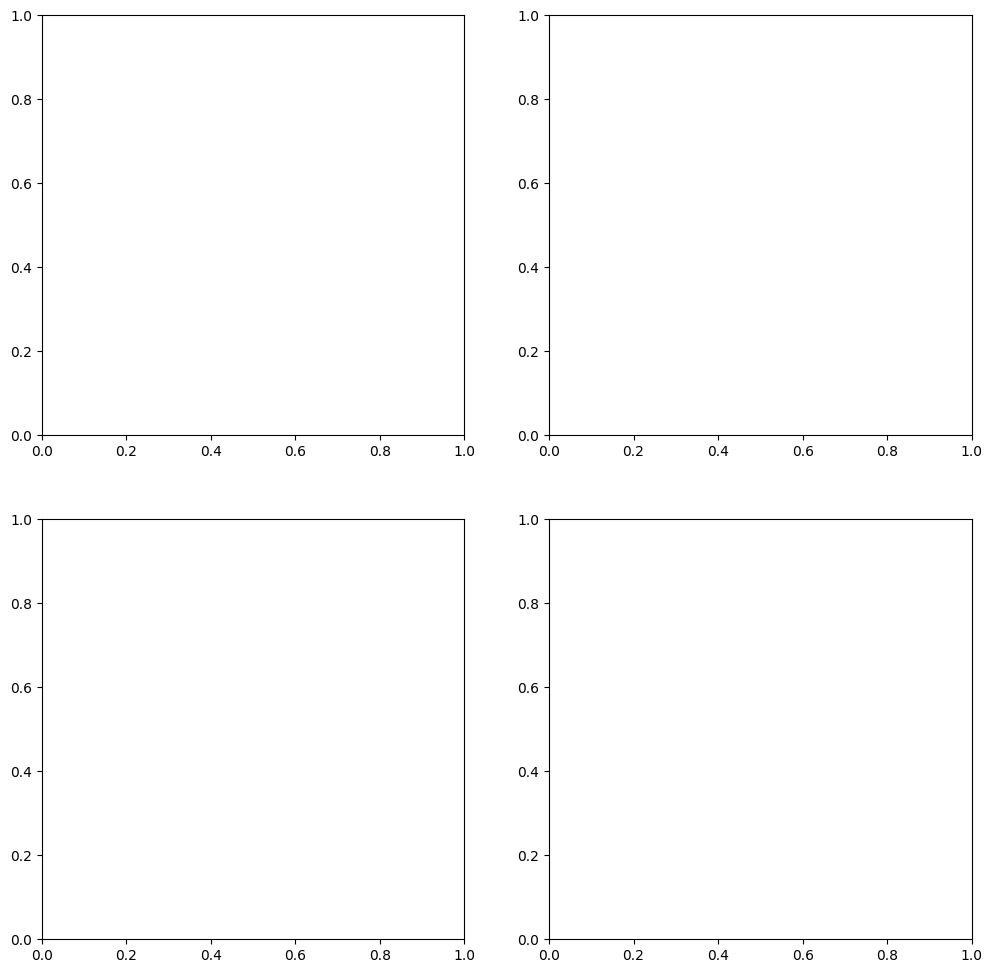

In [12]:
##En fonctions des epochs
param_lstm=HyperParameters()
param_lstm.n_epochs=5

fig,monte_carlo_test_acc,mean_acc_test,IC_acc_test=Compare_epochs(
    datasets=Data_list,
    models=model_list,
    params=params_list,
    spec_param=params_special,
    colors=colors,
    alpha=0.95,
    label=label,
    supra_epochs=2,
    Conf_int=False
)
monte_carlo_test_acc.shape

In [ ]:
param_grid_searcher="lr"
param_lstm.
param_lstm.n_epochs=5
grid=linspace(1e-1,1e-3,15)
grid


array([0.1       , 0.09292857, 0.08585714, 0.07878571, 0.07171429,
       0.06464286, 0.05757143, 0.0505    , 0.04342857, 0.03635714,
       0.02928571, 0.02221429, 0.01514286, 0.00807143, 0.001     ])

In [ ]:
grids = {
    "n_epochs": 25,
    "n_conv_in": (32,64, 128,256),
    "n_conv_in2": (32,64, 128,256),
    "n_conv_in3": (32,64, 128,256),
    "n_Flat_out": (32,64, 128,256),
    "stride_1": (1,2),
    "stride_2": (1,2),
    "stride_3": 1,
    "stride_pool_1": 1,
    "stride_pool_2": 1,
    "stride_pool_3": 1,
    "kernel_size_1": (4,5,6,7),
    "kernel_size_2": (2,3,4),
    "kernel_size_3": (2,3,4),
    "kernel_size_pool_1": np.arange(3)[2:],
    "kernel_size_pool_2": np.arange(3)[2:],
    "kernel_size_pool_3": (2,3),
    "dilation_1": np.arange(3)[1:],
    "dilation_2": np.arange(3)[1:],
    "dilation_3": np.arange(3)[1:],
    "dilation_pool_1": 1,
    "dilation_pool_2": 1,
    "dilation_pool_3": 1,
    "padding_1": np.arange(3)[1:],
    "padding_2": np.arange(3)[1:],
    "padding_3": np.arange(3)[1:],
    "padding_pool_1": np.arange(2)[1:],
    "padding_pool_2": np.arange(2)[1:],
    "padding_pool_3": np.arange(2)[1:],
    "opt": "Adam",
    "lr": (0.00089,0.0001,0.00007),
    "loss": nn.CrossEntropyLoss(),
    "activation": [nn.Tanh(),nn.Sigmoid()],
    "lr":(0.0001,0.0005,0.001,0.005,0.0089),
    "opt":["Adam","SGD","Adagrad","AdaDelta"]
}


In [ ]:
parametres_a_tester=["opt","activation","lr"]

In [ ]:
Hyperparameter_Search(model_class="LSTM_class",hyperparams=param_lstm,grids=grids,x=X1,y=Y1,supra_epochs=1,parameters=parametres_a_tester)

opt = Adam


100%|██████████| 1/1 [00:56<00:00, 56.10s/it]


opt = SGD


100%|██████████| 1/1 [00:54<00:00, 54.85s/it]


opt = Adagrad


100%|██████████| 1/1 [00:55<00:00, 55.10s/it]


opt = AdaDelta


100%|██████████| 1/1 [00:53<00:00, 53.57s/it]


opt = Adam


100%|██████████| 1/1 [00:53<00:00, 53.48s/it]


opt = SGD


100%|██████████| 1/1 [00:51<00:00, 51.32s/it]


opt = Adagrad


100%|██████████| 1/1 [00:44<00:00, 44.70s/it]


opt = AdaDelta


100%|██████████| 1/1 [00:44<00:00, 44.36s/it]


opt = Adam


100%|██████████| 1/1 [00:44<00:00, 44.11s/it]


opt = SGD


100%|██████████| 1/1 [00:43<00:00, 43.42s/it]


opt = Adagrad


100%|██████████| 1/1 [00:47<00:00, 47.97s/it]


opt = AdaDelta


100%|██████████| 1/1 [00:45<00:00, 45.56s/it]


opt = Adam


100%|██████████| 1/1 [00:46<00:00, 46.03s/it]


opt = SGD


100%|██████████| 1/1 [00:45<00:00, 45.36s/it]


opt = Adagrad


100%|██████████| 1/1 [00:44<00:00, 44.70s/it]


opt = AdaDelta


100%|██████████| 1/1 [00:43<00:00, 43.88s/it]


activation = Tanh()


100%|██████████| 1/1 [00:47<00:00, 47.98s/it]


activation = Sigmoid()


100%|██████████| 1/1 [00:50<00:00, 50.52s/it]


activation = Tanh()


100%|██████████| 1/1 [00:47<00:00, 47.62s/it]


activation = Sigmoid()


100%|██████████| 1/1 [00:43<00:00, 43.61s/it]


lr = 0.0001


100%|██████████| 1/1 [00:43<00:00, 43.96s/it]


lr = 0.0005


100%|██████████| 1/1 [00:43<00:00, 43.34s/it]


lr = 0.001


100%|██████████| 1/1 [00:43<00:00, 43.84s/it]


lr = 0.005


100%|██████████| 1/1 [00:43<00:00, 43.82s/it]


lr = 0.0089


100%|██████████| 1/1 [00:44<00:00, 44.42s/it]


lr = 0.0001


100%|██████████| 1/1 [00:42<00:00, 42.91s/it]


lr = 0.0005


100%|██████████| 1/1 [00:43<00:00, 43.12s/it]


lr = 0.001


100%|██████████| 1/1 [00:43<00:00, 43.00s/it]


lr = 0.005


100%|██████████| 1/1 [00:44<00:00, 44.61s/it]


lr = 0.0089


100%|██████████| 1/1 [00:43<00:00, 43.18s/it]


lr = 0.0001


100%|██████████| 1/1 [00:43<00:00, 43.94s/it]


lr = 0.0005


100%|██████████| 1/1 [00:42<00:00, 42.89s/it]


lr = 0.001


100%|██████████| 1/1 [00:51<00:00, 51.65s/it]


lr = 0.005


100%|██████████| 1/1 [00:47<00:00, 47.58s/it]


lr = 0.0089


100%|██████████| 1/1 [00:41<00:00, 41.57s/it]


lr = 0.0001


100%|██████████| 1/1 [00:41<00:00, 41.42s/it]


lr = 0.0005


100%|██████████| 1/1 [00:41<00:00, 41.40s/it]


lr = 0.001


100%|██████████| 1/1 [00:40<00:00, 40.61s/it]


lr = 0.005


100%|██████████| 1/1 [00:40<00:00, 41.00s/it]


lr = 0.0089


100%|██████████| 1/1 [00:43<00:00, 43.81s/it]


lr = 0.0001


100%|██████████| 1/1 [00:44<00:00, 44.60s/it]


lr = 0.0005


100%|██████████| 1/1 [00:42<00:00, 42.44s/it]


lr = 0.001


100%|██████████| 1/1 [00:41<00:00, 41.45s/it]


lr = 0.005


100%|██████████| 1/1 [00:41<00:00, 41.48s/it]


lr = 0.0089


100%|██████████| 1/1 [00:41<00:00, 41.26s/it]


(<Functional_Data_functions.HyperParameters at 0x1e85adbaf40>,
 tensor([24.0000, 26.4000, 26.4000, 26.4000, 26.4000, 26.4000, 26.4000, 28.0000,
         28.0000, 28.8000, 30.4000, 30.4000, 30.4000, 30.4000, 30.4000, 30.4000,
         30.4000, 32.0000, 32.8000, 32.8000, 33.6000, 35.2000, 36.0000, 36.8000,
         36.8000, 37.6000, 37.6000, 39.2000, 40.0000, 41.6000]))

In [ ]:
import pickle

# Assuming you have an object of the Hyperparameters class


# Specify the file path where you want to save the object
file_path = "hyperparams.pkl"

# Open a file in binary write mode
with open("C:/Users/Utilisateur/Pictures/Images et animation/hyperparameters", 'wb') as file:
    # Use pickle.dump() to save the object
    pickle.dump(param_lstm, file)


PermissionError: [Errno 13] Permission denied: 'C:/Users/Utilisateur/Pictures/Images et animation/hyperparameters'

In [ ]:
param_lstm.activation

Sigmoid()

In [ ]:
x=X1
y=Y1
supra_epochs=1
model_class='lstm'
hyperparams=param_lstm
parameter=param_grid_searcher
Final_acc = torch.tensor([0])
norm=torch.zeros(len(grid))
Optimum_parameter = grid[0]
if len(unique(y.cpu()))<y.shape[0]//2:
    output_size=len(unique(y.cpu()))
    hyperparams.loss=nn.CrossEntropyLoss()
else:
    output_size=y.shape[1]
    hyperparams.loss=nn.MSELoss()
for i,value in enumerate(grid):
    setattr(hyperparams, parameter, value)
    print(parameter,"=",value)
    # Modifier la valeur de l'attribut de la classe HyperParameters
    if torch.norm(monte_carlo_test_acc)>torch.norm(Final_acc.float()):
        Final_acc=monte_carlo_test_acc
        print(i,hyperparams.parameter,'torch norm=', torch.norm(monte_carlo_test_acc))
        
        hyperparams.parameter=value
        

lr = 0.01
0 0.01 torch norm= tensor(299.6596)
lr = 0.006999999999999999
lr = 0.003999999999999999
lr = 0.001


In [ ]:


# Obtenir l'attribut correspondant au paramètre spécifié
attribute = getattr(hyperparams, parameter)

for i,value in enumerate(grid):
    # Modifier la valeur de l'attribut de la classe HyperParameters
    setattr(hyperparams, parameter, value)
    print(parameter,"=",value)
    # Utiliser l'instance de HyperParameters pour effectuer les tests
    monte_carlo_test_acc,monte_carlo_train_acc,mean_acc_train,var_acc_train,IC_acc_train, mean_acc_test,var_acc_test,IC_acc_test = Hyperparameter_Test(supra_epochs=supra_epochs,hyperparameters=hyperparams,model_class=model_class,x=x,y=y,output_size=output_size)
    
    if torch.norm(monte_carlo_test_acc)>Final_acc:
        Final_acc=mean_acc_test
        hyperparams.parameter=value

lr = 0.01


  0%|          | 0/1 [00:19<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
param_lstm.lr

0.001

In [ ]:
testmodel=Compile_class(x_train=X5,hyperparams=param1,output_size=3)


X,Y=X5,Y5
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,shuffle=True)    
# accuracy_training=((torch.sum(torch.argmax(testmodel(x_train),dim=1)==y_train)/x_train.shape[0])*100).cpu().unsqueeze(0)


In [ ]:
Y=Y5
output_size=Y5.shape[1]
len(unique(Y.cpu()))<Y.shape[0]//2


False

In [ ]:
lstm=Compile_class(hyperparams=param3,x_train=X4,output_size=4,model_class="lstm")
x=X4
hyperparams=param3
print(lstm)
data_matrix=torch.tensor(x.data_matrix).float().cuda()
input=data_matrix.reshape(data_matrix.shape[0],data_matrix.shape[2],data_matrix.shape[1])
lstm_out=lstm.lstm(input)[0]
print(hyperparams.n_channel,hyperparams.bidirectional+1,hyperparams.n_conv_in,lstm_out.shape)
nn.Flatten()(lstm_out).cuda()
test=nn.Linear(hyperparams.n_conv_in*hyperparams.n_channel*(hyperparams.bidirectional+1),hyperparams.n_conv_in2).cuda()
# lstm.fc_block(lstm_out).shape
train_lstm=Compile_train(module=lstm, hyperparams=hyperparams, X=X4,Y=Y4,data_amount=10000)




LSTM_class(
  (lstm): LSTM(365, 32, num_layers=5, batch_first=True, bidirectional=True)
  (fc_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=128, out_features=512, bias=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.18)
    (4): Identity()
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.18)
    (8): Linear(in_features=256, out_features=4, bias=True)
  )
)
2 2 32 torch.Size([35, 2, 64])


In [ ]:
train_lstm(10)

(tensor([ 0.0000, 19.2308, 19.2308, 19.2308, 19.2308, 19.2308, 19.2308, 19.2308,
         19.2308, 19.2308, 19.2308]),
 tensor([ 0.0000, 44.4444, 44.4444, 44.4444, 44.4444, 44.4444, 44.4444, 44.4444,
         44.4444, 44.4444, 44.4444]))

In [ ]:
##Création des méthodes de smoothing pour chaque dataset:
##Phoneme
Smoother1=Smoothing_method(n_knots=8,order=4)

##Choix du nombre d'epochs 
n_epoch=50
opt='Adam'
##Création des hyperparamètres:

param1=HyperParameters(n_epochs=n_epoch, Smoothing_method=Smoother1, granulation=5000,
                 n_conv_in=32, n_conv_in2=64, n_conv_in3=128,n_conv_out=2, n_Flat_out=256,
                 stride_1=200, stride_2=1, stride_3=1,
                 stride_pool_1=1, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=12,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=150, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=200, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt=opt, lr=0.0089, loss=nn.CrossEntropyLoss(),activation=nn.Identity(),negative_slope=0.17,derivative=[0])

param2=HyperParameters(n_epochs=25, Smoothing_method=Smoother1, granulation=5500,
                 n_conv_in=32, n_conv_in2=128, n_conv_in3=256, n_Flat_out=256,
                 stride_1=95, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=1, stride_pool_3=1,
                 kernel_size_1=12,  kernel_size_2=5, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=2,
                 dilation_1=180, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=0, padding_pool_2=0, padding_pool_3=0,
                 opt=opt, lr=0.0001, loss=nn.CrossEntropyLoss(),
                 activation=nn.Identity(),
                 negative_slope=0.18,derivative=[0,1])
param3=HyperParameters(n_epochs=75, Smoothing_method=Smoother1, granulation=1000,
                 n_conv_in=128, n_conv_in2=128, n_conv_in3=128, n_Flat_out=64,
                 stride_1=95, stride_2=1, stride_3=1,
                 stride_pool_1=3, stride_pool_2=2, stride_pool_3=2,
                 kernel_size_1=5,  kernel_size_2=3, kernel_size_3=4,
                 kernel_size_pool_1=3, kernel_size_pool_2=2, kernel_size_pool_3=3,
                 dilation_1=250, dilation_2=1, dilation_3=1,
                 dilation_pool_1=1, dilation_pool_2=1, dilation_pool_3=1,
                 padding_1=0, padding_2=2, padding_3=2,
                 padding_pool_1=1, padding_pool_2=1, padding_pool_3=1,
                 opt=opt, lr=0.0001, loss=nn.CrossEntropyLoss(),
                 activation=nn.Identity(),
                 negative_slope=0.18,derivative=[0,1,2])
params_list=[param2]
params_special=[param2,param3,param3,param3]
print(conv_total_out(param2))
model_list=["TSCNN","LSTM","MLP","GRU"]
colors=["darkred","magenta","darkgreen","darkblue"]
label=["param1 "," param2","param3"]
check=10
# [X1.shape[0]//check,X2.shape[0]//check,X3.shape[0]//check,X4.shape[0]//check,
[X1.shape[0]/check,X2.shape[0]/check,X3.shape[0]/check,X4.shape[0]/check,
len(range(2,X1.shape[0]*3//4,X1.shape[0]//check)),len(range(2,X2.shape[0]*3//4,X2.shape[0]//check)),len(range(2,X3.shape[0]*3//4,X3.shape[0]//check)),len(range(2,X4.shape[0]*3//4,X4.shape[0]//check))]

NameError: name 'Smoothing_method' is not defined

In [ ]:
##En fonction des données 
fig,monte_carlo_test_acc,monte_carlo_train_acc,mean_acc_train,mean_acc_test,var_acc_train,var_acc_test,IC_acc_train,IC_acc_test=Compare_n_datas(

    datasets=Data_list,
    models=model_list,
    params=params_list,
    spec_param=params_special,
    colors=colors,
    alpha=0.95,
    # label=label,
    supra_epochs=20,

    checkpoints_number=10,
)

NameError: name 'Compare_n_datas' is not defined